In [ ]:
#########
# In this notes, I tried to group columns based on KMNEANS
# The idea is to find similar columns that are semantically similar
# Once we have similar group of columns, We can check each group and figure out which coulmns could be use to create new features
# I have uses a sentence embedding model for the feature/column name 
#########

In [ ]:
all_features_name = ['NEGATIVE EVENTS IN LAST 6 MONTHS (LOANS)',
 'AVG. MONTHLY CREDIT TRANSACTIONS AMOUNT LAST 180 DAYS',
 'AVG. OF MINIMUM BALANCE PER MONTH LAST 360 DAYS',
 'RECHARGES LAST 150-180 DAYS',
 'count_debit_transactions_last_360_days',
 'CUMULATIVE MAXIMUM BALANCE LAST 30 DAYS',
 'RECHARGES WITH RECHARGE AMOUNTS MORE THAN 200 LAST 30-60 DAYS',
 'AVG. MONTHLY FIXED LINE BILL AMOUNT LAST 30 DAYS',
 'UTILITIES PAYING BILLS FOR',
 'LOAN DISBURSEMENT AMOUNT LAST 180 DAYS',
 'AVG. MONTHLY DEBIT CARD TRANSACTIONS AMOUNT LAST 180 DAYS',
 'AVG. DAILY DEBIT TRANSACTIONS AMOUNT LAST 180 DAYS',
 'RECHARGES WITH RECHARGE AMOUNTS RANGING FROM 0 - 50 LAST 30 DAYS',
 'CUMULATIVE MINIMUM BALANCE LAST 90 DAYS',
 'Last closing balance amount (overall)',
 'ATM TRANSACTIONS LIFETIME',
 'AVG. MONTHLY DEBIT LAST 30 DAYS BY AVG. MONTHLY DEBIT LAST 90 DAYS',
 'FLAG - OTHER LOAN',
 'NO OF LOANS CLOSED LAST 12 MONTHS',
 'CHEQUES RETURNED DUE TO INSUFFICINT FUND LAST 30 DAYS',
 'Loan approved in last 7 days',
 'CHEQUES RETURNED DUE TO INSUFFICINT FUND LAST 180 DAYS',
 'total_debit_transaction_amount_last_90_days',
 'CURRENT LOAN LIABILITY IN THE LAST 3 MONTHS',
 'NO OF LOANS DISBURSED LAST 180 DAYS',
 'CREDIT APPLICATIONS REJECTED LAST 360 DAYS',
 'AVG. DAILY DEBIT LAST 30 DAYS BY AVG. DAILY DEBIT LAST 60-120 DAYS',
 'total_debit_transaction_amount_last_360_days',
 'RECHARGES WITH RECHARGE AMOUNTS RANGING FROM 50 - 100 LAST 30 DAYS',
 'AVG. MONTHLY CREDIT TRANSACTIONS AMOUNT LIFETIME',
 'AVG. DAILY DEBIT TRANSACTIONS COUNT LIFETIME',
 'TOTAL DEBIT AMOUNT : TOTAL CREDIT AMOUNT RATIO LAST 90 DAYS',
 'AVG. MONTHLY BROADBAND BILL AMOUNT LAST 90 DAYS',
 'FLAG - GOLD LOAN',
 'Loan approved in last 28 days',
 'NEFT/RTGS/IMPS TRANSACTIONS LAST 30 DAYS',
 'NEFT/RTGS/IMPS TRANSACTIONS LAST 360 DAYS',
 'distance_from_pin_code',
 'AVG. OF MAXIMUM BALANCE PER MONTH LIFETIME LAST 30 DAYS',
 'BELOW MAB PENALTY OCCURANCES LAST 90 DAYS',
 'AVG. OF MAXIMUM BALANCE PER MONTH LIFETIME',
 'NO OF LOANS CLOSED LAST 6 MONTHS',
 'AVG. DAILY CREDIT TRANSACTIONS AMOUNT LIFETIME',
 'Loan defaults in last 21 days',
 'AVG. MISSED PAYMENT AMOUNT LAST 360 DAYS',
 'AVG. MONTHLY POSTPAID BILL AMOUNT LAST 30 DAYS',
 'CREDIT APPLICATIONS REJECTED LAST 30 DAYS',
 'AVG. CREDIT PER TRANSACTION LAST 30 DAYS',
 'AVG. MONTHLY BROADBAND BILL AMOUNT LIFETIME',
 'Loan approved in last 14 days']
all_features_name = [i.lower().strip() for i in all_features_name]

In [ ]:
# !pip install transformers
# !pip install sentence_transformers

In [ ]:
import transformers as t
import torch
from sentence_transformers import SentenceTransformer

In [ ]:
sentences = ["This is an example sentence", "Each sentence is converted"]
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
embeddings = model.encode(sentences)
print(embeddings.shape)

(2, 384)


In [ ]:
embeddings = model.encode(all_features_name)
print(embeddings.shape)

(50, 384)


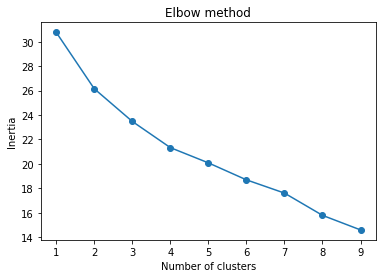

In [ ]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

data = embeddings
inertias = []

for i in range(1,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,10), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(data)

KMeans(n_clusters=10)

In [ ]:
kmeans.labels_

array([1, 0, 5, 3, 2, 5, 3, 6, 6, 4, 0, 0, 3, 5, 5, 0, 0, 9, 1, 7, 4, 7,
       2, 1, 1, 4, 0, 2, 3, 0, 0, 2, 6, 9, 4, 0, 0, 8, 5, 2, 5, 1, 0, 4,
       6, 6, 4, 0, 6, 4], dtype=int32)

In [ ]:
from collections import defaultdict

final_group_dict = defaultdict(list)
for index,cluster in enumerate(kmeans.labels_):
  final_group_dict[cluster].append(all_features_name[index])

In [ ]:
final_group_dict[0]

['avg. monthly credit transactions amount last 180 days',
 'avg. monthly debit card transactions amount last 180 days',
 'avg. daily debit transactions amount last 180 days',
 'atm transactions lifetime',
 'avg. monthly debit last 30 days by avg. monthly debit last 90 days',
 'avg. daily debit last 30 days by avg. daily debit last 60-120 days',
 'avg. monthly credit transactions amount lifetime',
 'avg. daily debit transactions count lifetime',
 'neft/rtgs/imps transactions last 30 days',
 'neft/rtgs/imps transactions last 360 days',
 'avg. daily credit transactions amount lifetime',
 'avg. credit per transaction last 30 days']

In [ ]:
#########
# here if we notice avg. monthly credit transactions amount last 180 days vs avg. monthly debit transactions amount last 180 days could be used as a ratio
# to check the user spending habits
#########